In [1]:
from k6221 import *

In [2]:
rm = pyvisa.ResourceManager()
x = None

In [3]:
address = "TCPIP::10.0.4.138::1394::SOCKET"
dev = Keithley6221(address=address, rm=rm)

In [4]:
print(dev.get_idn())

KEITHLEY INSTRUMENTS INC.,MODEL 6221,4018989,D02  /700x 


In [11]:
dev.get_units()

<UNITS.Volts: 'V'>

In [19]:
dev.RunDeltaMeasurements(
            units=dev.UNITS.Ohms,
            current=1e-6,
            delay=10e-3,
            count="INF",
            swe_count=1,
    )

In [16]:
dev.WriteCommand("SOUR:SWE:ABOR")


In [42]:
dev.UNITS.Ohms

<UNITS.Ohms: 'OHMS'>

Trace actual size 65
Trace buffer free size 2095072,2080
Trace length: 130
Trace numbers:  [5.27392435, 0.0, 5.26078272, 0.031, 5.381814, 0.062, 5.324615, 0.093, 5.23061895, 0.123, 5.22010517, 0.154, 5.29357481, 0.185, 5.37467909, 0.216, 5.38544321, 0.248, 5.38569355, 0.278, 5.37956047, 0.31, 5.38181353, 0.34, 5.3766818, 0.372, 5.36679411, 0.402, 5.36679411, 0.434, 5.38156319, 0.464, 5.38531828, 0.496, 5.37818384, 0.526, 5.3860693, 0.558, 5.38256454, 0.588, 5.29908228, 0.619, 5.2123456, 0.65, 5.19982958, 0.681, 5.28731728, 0.712, 5.38231516, 0.743, 5.31147385, 0.773, 5.22749043, 0.804, 5.21810341, 0.835, 5.29282427, 0.866, 5.37693262, 0.897, 5.29945803, 0.927, 5.2204814, 0.958, 5.22698975, 0.989, 5.31197453, 1.02, 5.398211, 1.051, 5.3181076, 1.082, 5.22636414, 1.112, 5.20371008, 1.143, 5.28556538, 1.174, 5.36767054, 1.205, 5.28143501, 1.236, 5.20721436, 1.266, 5.21910477, 1.297, 5.29345036, 1.328, 5.37292814, 1.359, 5.30008411, 1.39, 5.21046829, 1.421, 5.2049613, 1.451, 5.28919458, 1.4

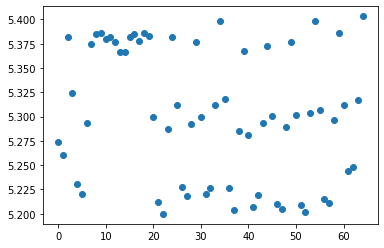

In [20]:
count = dev.get_trace_actual_data_points()
print("Trace actual size", count)
print("Trace buffer free size", dev.get_trace_free_memory())
numbers = dev.get_trace_data()
print(f"Trace length: {len(numbers)}")
print(f"Trace numbers: ", numbers)
points = [numbers[2 * i] for i in range(count)]
# currents = [start_current + i * step_size for i in range(points.__len__())]
time_stamps = [numbers[2 * i + 1] for i in range(count)]
print(f"Trace data type: {dev.get_trace_data_type()}")
plt.plot(points, "o")
plt.show()

In [19]:
points

[30.5870953, 2.12869692, 2.11342716, 2.12531757]

In [14]:
rm.close()

In [41]:
dev.WriteCommand("SOUR:DCON:CABort OFF")

In [43]:
start_current = -100e-6
stop_current=100e-6
step_size=0.1e-6
delay=0.002
delta=10e-6
buffer_points: int = 60000
##############################################################################################
estimated_time = ((stop_current - start_current) / step_size + 1) * (delay + 0.125) + 10
dev.RunDifferentialConductanceMeasurements(
    start_current=start_current,
    stop_current=stop_current,
    step_size=step_size,
    delay=delay,
    delta=delta,
    buffer_points=buffer_points,
)
# sleep_interval = 4.7
# time.sleep(sleep_interval + 0)
# time_started = datetime.now()
# count = dev.get_trace_actual_data_points()
# print("Trace actual size", count)
# print("Trace buffer free size", dev.get_trace_free_memory())
# numbers = dev.get_trace_data()
# print(f"Trace length: {len(numbers)}")
# print(f"Trace numbers: ", numbers)
# points = [numbers[2 * i] for i in range(count)]
# currents = [start_current + i * step_size for i in range(points.__len__())]
# time_stamps = [numbers[2 * i + 1] for i in range(count)]
# print(f"Trace data type: {dev.get_trace_data_type()}")
# plt.plot(currents, points, "o")
# plt.show()

And START_CURRENT =  -1.000000E-04
And STOP_CURRENT =  1.000000E-04
And STEP =  1.000000E-07
And DELTA =  0.00001
dIdV program is fully initialized!


Trace actual size 1
Trace buffer free size 2097120,32
Trace length: 2
Trace numbers:  [5.28741148e-05, 0.0]
Trace data type: DCON


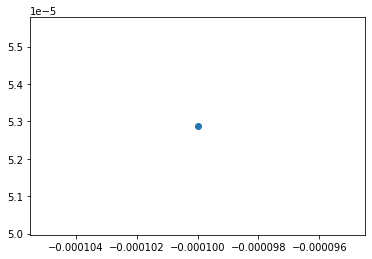

In [44]:
count = dev.get_trace_actual_data_points()
print("Trace actual size", count)
print("Trace buffer free size", dev.get_trace_free_memory())
numbers = dev.get_trace_data()
print(f"Trace length: {len(numbers)}")
print(f"Trace numbers: ", numbers)
points = [numbers[2 * i] for i in range(count)]
currents = [start_current + i * step_size for i in range(points.__len__())]
time_stamps = [numbers[2 * i + 1] for i in range(count)]
print(f"Trace data type: {dev.get_trace_data_type()}")
plt.plot(currents, points, "o")
plt.show()

In [22]:
count = dev.get_trace_actual_data_points()
print("Trace actual size", count)

Trace actual size 1


In [23]:
currents

[-1e-05]

In [32]:
dev.WriteCommand("SOUR:DCON:DELTa 1e-6")
dev.QueryCommand("SOUR:DCON:DELTa?")

'0.00000'

In [33]:
dev.QueryCommand(f"SOUR:DCON:STOP?")


'1.000000E-04'

In [37]:
dev.RunLinSweep(st=10e-6, en=100e-6, step=0.1e-6)